# Pre-analysis

The imports for this section

In [4]:
import pandas
import matplotlib.pyplot as plt
import math
import os
import numpy as np
from tqdm import tqdm

import warnings

average_day() takes the station number to plot, and then calculates the average population of the station over the course of a day

In [5]:
def extract_date(x):
    return x.split(' ')[0]


def extract_year(x):
    return x.split(' ')[0].split('-')[0]


def plot_average_day(station, year=0):
    """
    Plots the average population of a station over time
    (so the average of a station at a certain time of day)
    """
    filename = '../datasets/bss/dublin/reorg/station_' + str(station) + '.csv'

    if not os.path.exists(filename):
        print("Station file " + str(station) + " does not exist")
        return

    dataset = pandas.read_csv(filename, usecols=['TIME', 'AVAILABLE BIKES', 'int_time'])
    dataset['DATE'] = dataset['TIME'].apply(lambda x: extract_date(x))
    dataset['YEAR'] = dataset['TIME'].apply(lambda x: extract_year(x))

    # Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = dataset['int_time'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    if year != 0:
        dataset = dataset.loc[dataset['YEAR'] == str(year)]
        if len(dataset) == 0:
            print("No data exists for " + str(year))
            return

    for i, row in dataset.iterrows():
        time_total[row['int_time']] = time_total[row['int_time']] + row['AVAILABLE BIKES']
        time_count[row['int_time']] = time_count[row['int_time']] + 1

    averages = [x / y for x, y in zip(time_total.values(), time_count.values())]

    label = 'S' + str(station)
    if year != 0:
        label = label + ',' + str(year)

    plt.plot(times, averages, label=label)


def show_average_day_plot():
    plt.xlabel('Time')
    plt.ylabel('Available bikes')

    x = [0, 48, 96, 144, 192, 240, 288]
    labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00']
    plt.xticks(x, labels)
    
    #Comment this out to disable legend
    plt.legend()
    
    plt.show()

Calls average_day() on a station CSV and opens the graph

 50%|█████████████████████████████████████████▌                                         | 5/10 [03:22<03:24, 40.81s/it]

Station file 35 does not exist


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:04<00:00, 36.40s/it]


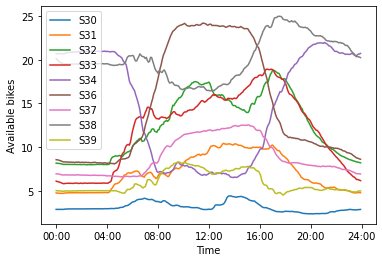

In [7]:
###This code plots ALL stations on the same graph
# stations = pandas.read_csv("./datasets/bss/dublin/dublin.csv", usecols=["Number"])
# for station in stations['Number']:
#     plot_average_day(station)

###This code plots all stations in the range (30-39) inclusive
for x in tqdm(range(30, 40)):
    plot_average_day(x)

###This code plots the average population for a given station in 2018, 2019 and 2020 respectively
# station = 3
# plot_average_day(station, 2018)
# plot_average_day(station, 2019)
# plot_average_day(station, 2020)

show_average_day_plot()

Color names from https://towardsdatascience.com/usage-patterns-of-dublin-bikes-stations-484bdd9c5b9e

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:17<00:00, 36.84s/it]


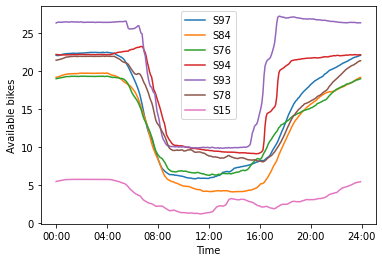

In [8]:
# Green // Outer stations
stations = [97, 84, 76, 94, 93, 78, 15]
for x in tqdm(stations):
    plot_average_day(x)
show_average_day_plot()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:26<00:00, 38.12s/it]


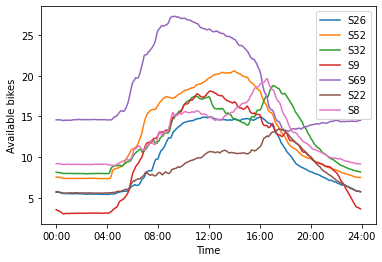

In [9]:
# Blue // Central stations
stations = [26, 52, 32, 9, 69, 22, 8]
for x in tqdm(stations):
    plot_average_day(x)
show_average_day_plot()

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:08<00:00, 37.65s/it]


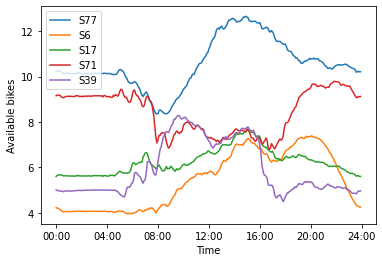

In [10]:
# Red // Intermediary stations
stations = [77, 6, 17, 71, 39]
for x in tqdm(stations):
    plot_average_day(x)
show_average_day_plot()

### Evaluating the impact of 2020 on the dataset

Thanks to the pandemic, 2020 has been a very unique year in all aspects of life, including affecting the useage of BSSs. To combat this, I must analyse the impact 2020 has on the dataset in question.

Central stations

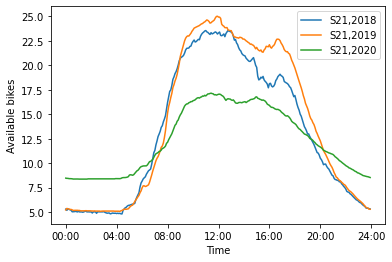

In [6]:
#Leinster Street South
station = 21
years = [2018, 2019, 2020]
for year in years:
    plot_average_day(station, year)

show_average_day_plot()

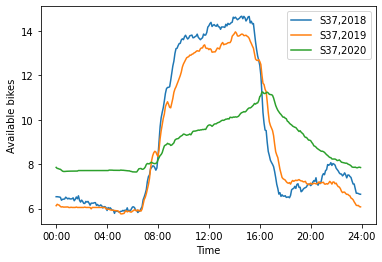

In [12]:
#St. Stephen's Green South
station = 37
years = [2018, 2019, 2020]
for year in years:
    plot_average_day(station, year)

show_average_day_plot()

Outer stations

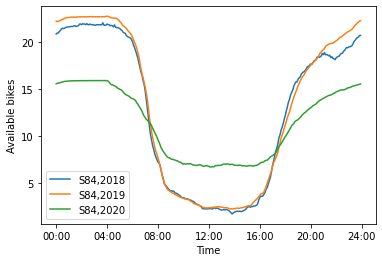

In [13]:
#Brookfield Road
station = 84
years = [2018, 2019, 2020]
for year in years:
    plot_average_day(station, year)

show_average_day_plot()

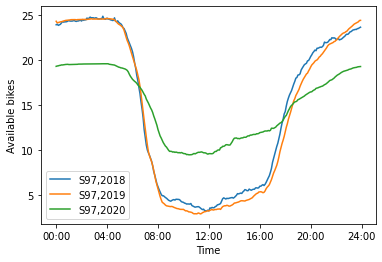

In [11]:
#Kilmainham Gaol
station = 97
years = [2018, 2019, 2020]
for year in years:
    plot_average_day(station, year)

show_average_day_plot()

Intermediary stations

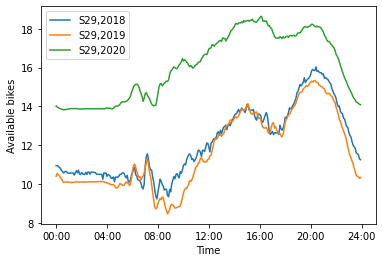

In [5]:
#Ormond Quay Upper
station = 29
years = [2018, 2019, 2020]
for year in years:
    plot_average_day(station, year)

show_average_day_plot()

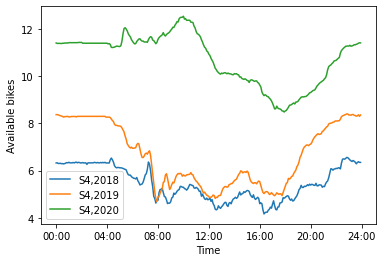

In [8]:
#Greek Street
station = 4
years = [2018, 2019, 2020]
for year in years:
    plot_average_day(station, year)

show_average_day_plot()

In [9]:
def average_dif_2020(station):    
    """
    Plots the average difference of a station over time between pandemic
    and non-pandemic times
    """
    filename = '../datasets/bss/dublin/reorg/station_' + str(station) + '.csv'

    if not os.path.exists(filename):
        print("Station file " + str(station) + " does not exist")
        return 0

    dataset = pandas.read_csv(filename, usecols=['TIME', 'AVAILABLE BIKES', 'int_time'])
#     dataset['INT_TIME'] = dataset['TIME'].apply(lambda x: convert_time(x))
    dataset['DATE'] = dataset['TIME'].apply(lambda x: extract_date(x))
    dataset['YEAR'] = dataset['TIME'].apply(lambda x: extract_year(x))

    # Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = dataset['int_time'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    dataset2020 = dataset.loc[dataset['YEAR'] == str(2020)]

    for i, row in dataset2020.iterrows():
        time_total[row['int_time']] = time_total[row['int_time']] + row['AVAILABLE BIKES']
        time_count[row['int_time']] = time_count[row['int_time']] + 1

    averages_2020 = [x / y for x, y in zip(time_total.values(), time_count.values())]

    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    dataset_norm = dataset.loc[dataset['YEAR'] != str(2020)]

    for i, row in dataset_norm.iterrows():
        time_total[row['int_time']] = time_total[row['int_time']] + row['AVAILABLE BIKES']
        time_count[row['int_time']] = time_count[row['int_time']] + 1

    averages_norm = [x / y for x, y in zip(time_total.values(), time_count.values())]

    differences = [x - y for x, y in zip(averages_2020, averages_norm)]

    differences = [abs(x) for x in differences]

    return sum(differences)/len(differences)

In [10]:
averages = []

stations = range(2, 80)

for station in tqdm(stations):
#     print(station)
    averages.append(average_dif_2020(station))


 15%|████████████▌                                                                     | 12/78 [07:14<39:53, 36.27s/it]

Station file 14 does not exist


 23%|██████████████████▉                                                               | 18/78 [10:17<34:02, 34.04s/it]

Station file 20 does not exist


 42%|██████████████████████████████████▋                                               | 33/78 [18:57<27:37, 36.84s/it]

Station file 35 does not exist


 56%|██████████████████████████████████████████████▎                                   | 44/78 [25:06<20:42, 36.56s/it]

Station file 46 does not exist


 74%|████████████████████████████████████████████████████████████▉                     | 58/78 [33:46<13:10, 39.52s/it]

Station file 60 does not exist


 87%|███████████████████████████████████████████████████████████████████████▍          | 68/78 [39:32<06:19, 37.94s/it]

Station file 70 does not exist


100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [45:24<00:00, 34.93s/it]


This code shows the average population difference for a station between its 2020 and 2018/2019 graphs.

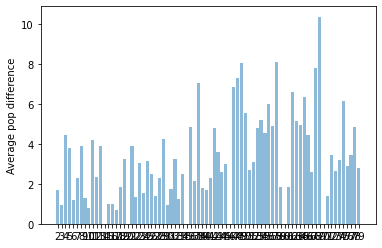

In [11]:
y_pos = np.arange(len(stations))

plt.bar(y_pos, averages, align='center', alpha=0.5)
plt.xticks(y_pos, stations)
plt.ylabel('Average pop difference')

plt.show()

# Weather impact

In [12]:
def plot_average_day_from_dataset(data, label=None):
    # Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = data['int_time'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    for i, row in data.iterrows():
        time_total[row['int_time']] = time_total[row['int_time']] + row['AVAILABLE BIKES']
        time_count[row['int_time']] = time_count[row['int_time']] + 1

    averages = [x / y for x, y in zip(time_total.values(), time_count.values())]

    if label is not None:
        plt.plot(times, averages, label=label)
    else:
        plt.plot(times, averages)


def show_average_day_plot():
    plt.xlabel('Time')
    plt.ylabel('Available bikes')

    x = [0, 48, 96, 144, 192, 240, 288]
    labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00']
    plt.xticks(x, labels)

    # Comment this out to disable legend
    plt.legend()

    plt.show()


def plot_average_day_by_condition(station, 
                                  rain_threshold = 0.1,
                                  temp_threshold = 12,
                                  rhum_threshold = 95):
    columns = {'rain': rain_threshold,
               'temp': temp_threshold,
               'rhum': rhum_threshold
               }

    warnings.filterwarnings("ignore")
    filename = '../datasets/bss/dublin/reorg_plus_weather/station_' + str(station) + '.csv'

    for col, threshold in columns.items():

        dataset = pandas.read_csv(filename).head(150609)
        # x = dataset[deciding_column].unique()
        # x.sort()
        # for d in x:
        #     print(d)
        # exit(0)

        if col == 'rain':
            dataset = dataset[dataset[col].str.strip().astype(bool)]

        dataset[col] = dataset[col].astype('float64')
        above_dataset = dataset.loc[dataset[col] >= threshold]

        below_dataset = dataset.loc[dataset[col] < threshold]

        plot_average_day_from_dataset(above_dataset, label=col + " >= " + str(threshold))
        plot_average_day_from_dataset(below_dataset, label=col + " < " + str(threshold))

        show_average_day_plot()

Removed 2020 from the dataset to remove it's effect

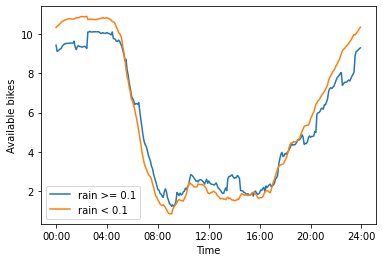

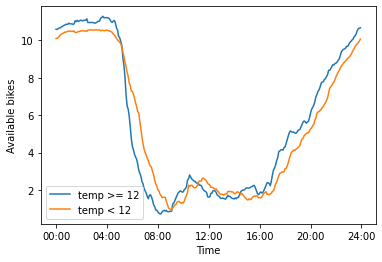

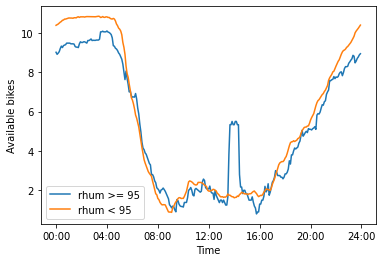

In [13]:
plot_average_day_by_condition(2)

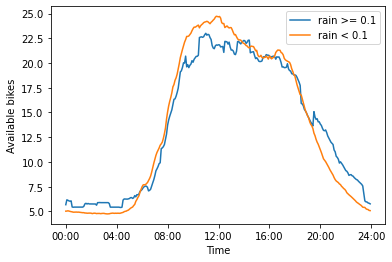

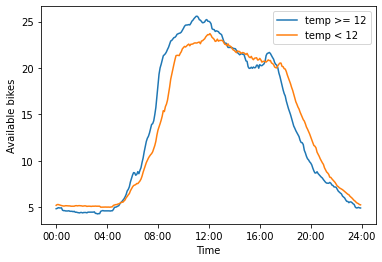

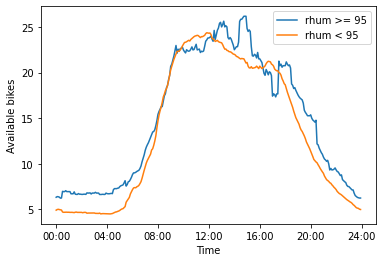

In [14]:
plot_average_day_by_condition(21)

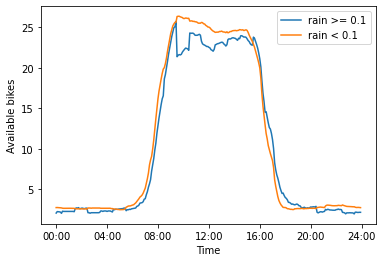

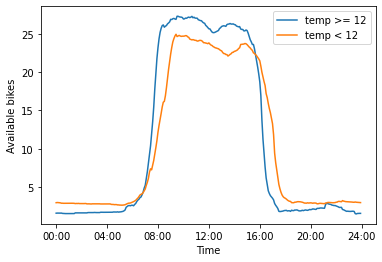

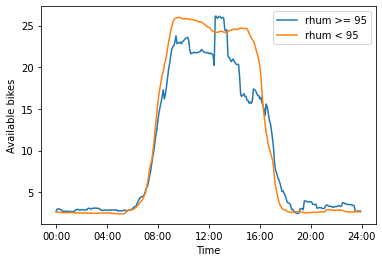

In [15]:
plot_average_day_by_condition(47)